In [16]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
ds = pd.read_csv('Food_Delivery_Time_Prediction.csv')
ds.head() 

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [18]:
ds.shape

(200, 15)

In [19]:
ds = ds.dropna()
ds.shape

#After dropind emplty values the shape remains same this mean there is no empty value

(200, 15)

In [20]:
#Checkin correlation of values to get the best feature
ds.corr(numeric_only=True)['Delivery_Time']

Distance                     -0.075143
Delivery_Person_Experience   -0.019098
Restaurant_Rating            -0.091855
Customer_Rating              -0.021952
Delivery_Time                 1.000000
Order_Cost                   -0.009307
Tip_Amount                   -0.029154
Name: Delivery_Time, dtype: float64

In [21]:
#lets first encode the data
from sklearn.preprocessing import LabelEncoder
le_T = LabelEncoder()
ds['Traffic_Conditions'] = le_T.fit_transform(ds['Traffic_Conditions'])
le_W = LabelEncoder()
ds['Weather_Conditions']=le_W.fit_transform(ds['Weather_Conditions'])
le_V=LabelEncoder()
ds['Vehicle_Type'] = le_V.fit_transform(ds["Vehicle_Type"])
le_O=LabelEncoder()
ds['Order_Priority'] = le_O.fit_transform(ds["Order_Priority"])
le_Ot=LabelEncoder()
ds['Order_Time'] = le_Ot.fit_transform(ds["Order_Time"])
ds.head()


,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,2,4,2,0,2,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,0,2,8,1,3,2,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,2,9,0,3,1,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,0,1,2,2,1,1,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,0,6,1,3,1,3.5,2.8,32.38,619.81,2.34


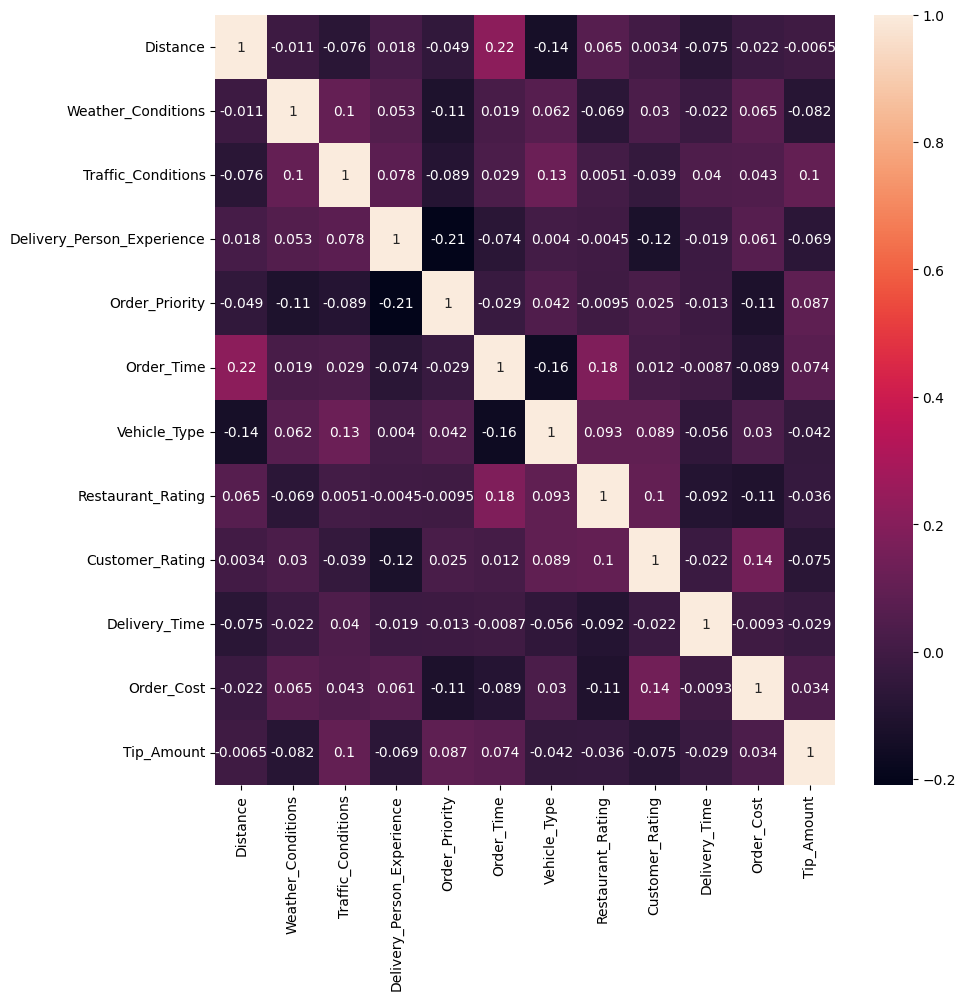

In [22]:
#Correlation to take the best feature variable
plt.figure(figsize=(10,10))
sns.heatmap(ds.corr(numeric_only=True),annot=True)

plt.show()

In [23]:
ds['Order_Time'].value_counts()
#By this value count we can see that Afternoon, and Evening are rush hours

Order_Time
0    59
1    57
3    45
2    39
Name: count, dtype: int64

In [24]:
#Making rush hours and not rushhour columns
ds['RushHour'] = np.where(ds['Order_Time'].isin(['Afternoon', 'Evening']), 1, 0)
ds['Not Rush_Hour'] = np.where(ds['Order_Time'].isin(['Morning', 'Night']), 1, 0)

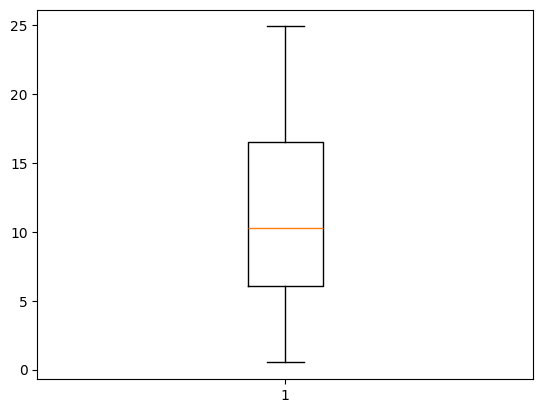

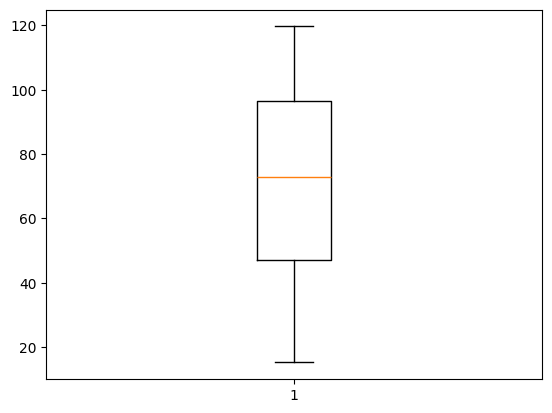

Regression Report: 
MSE:  1065.219850704157 
r2:  -0.1014464185216657 
mae:  26.98160303836026


In [25]:
#Now Normalizig the data and creating Linear Regression Model
from sklearn.preprocessing import StandardScaler
#selecting Feature best for prediction
X = ds[['Distance', 'Order_Priority', 'Traffic_Conditions']].values

#cheking for outliners
plt.boxplot(ds['Distance'])
plt.show()
plt.boxplot(ds['Delivery_Time'])
plt.show()

Y=np.array(ds['Delivery_Time'])

ss = StandardScaler()
X_Scaled = ss.fit_transform(X)

#splitting data
x_train,x_test, y_train,y_test = train_test_split(X_Scaled,Y,test_size=0.2)


#Model Creation
Lr = LinearRegression()
Lr.fit(x_train,y_train)

#prediction
y_predict = Lr.predict(x_test)

#Calculating matric
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
mse = mean_squared_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)

print("Regression Report: \nMSE: ",mse,"\nr2: ",r2,"\nmae: ",mae)



In [26]:
#making new column for delivery status
threshold = ds['Delivery_Time'].mean()


# Create binary target column
ds['Delivery_Status'] = ds['Delivery_Time'].apply(lambda x: 'Delayed' if x > threshold else 'Fast')

# Check it
print(ds['Delivery_Status'].value_counts())

Delivery_Status
Delayed    104
Fast        96
Name: count, dtype: int64


In [27]:
#Logistic regression for delivery status
x=ds[['Traffic_Conditions','Weather_Conditions','Vehicle_Type','Delivery_Person_Experience']]
le=LabelEncoder()
y = ds['Delivery_Status']

x_scaled=ss.fit_transform(x)
#Data splitting
x_train,x_test, y_train,Y_test = train_test_split(X_Scaled,y,test_size=0.2)

#Model Making
from sklearn.linear_model import LogisticRegression

lr =  LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

y_pred2 = lr.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report
print("Accuracy:", accuracy_score(Y_test, y_pred2))
print(classification_report(Y_test, y_pred2))




Accuracy: 0.5
              precision    recall  f1-score   support

     Delayed       0.47      0.83      0.60        18
        Fast       0.62      0.23      0.33        22

    accuracy                           0.50        40
   macro avg       0.55      0.53      0.47        40
weighted avg       0.55      0.50      0.45        40



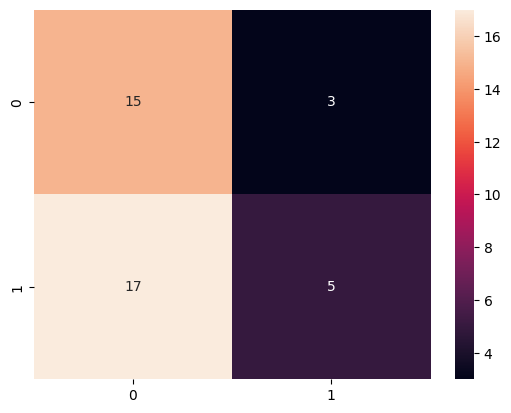

In [30]:
#Makig a confusion matrix of Logistic regression

from sklearn.metrics import confusion_matrix

#for linear regression
cm = confusion_matrix(Y_test,y_pred2)
sns.heatmap(cm,annot=True)
plt.show()

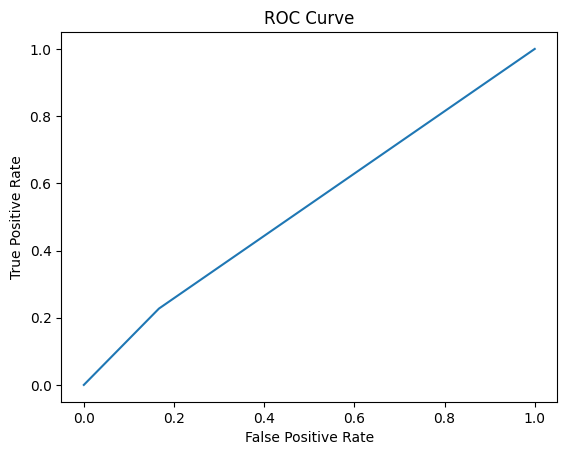

In [46]:

#ROC curve
from sklearn.metrics import roc_curve,auc
y_testtranform=le.fit_transform(Y_test)
y_pred2 = le.fit_transform(y_pred2)
fpr, tpr, _ = roc_curve(y_testtranform, y_pred2)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
#Suggestions

#As we can see by correlation
#the more the traffic the more will be delivery time
#Also vhicle type is positively correlated with traffic to small vhicle less traffic and less will be delivery time.
#Also choose delivery roots with less traffic.
